<div align ="right">Thomas Jefferson University <b>COMP 103</b>: Intro to Visualization</div>

# A quick review of data structures and plotting basics

Welcome back to coding class. In this class, Intro to Visualization, we will be digging deeper into the practice of scientific visualization. Before we start with new exercises, we probably need to review a few key concepts. This notebook will cover a couple of the basic data structures that will be useful to us in managing data and review some plotting basics.    

## Pandas Dataframes

The most widely used data structure in python-based data science is the pandas dataframe. `pandas` is a package that contains functions used to create, import, and manipulate data structures. By data structures we simply mean a table that is going to hold our data together. Without some kind of data structure, our data would just look like a bunch of disconnected lists, like this:

```
x_variable = [1, 2, 3, 4, 5, 6, 7]
y_variable = [4.5, 6.2, 7.1, 3.2, 5.1, 4.7, 5.4]

```
While this would work for creating a line graph of this data, it's a bad way to store and enter data, because it's very hard to review. In a data structure we could store the `x_variable` the `y_variable` and other data associated with the observation as a row within the data structure. 

To use pandas functions, we first import the library with the following command. 
```
import pandas as pd
```
where the `as` component sets up an abbreviation, `pd` that we can use to call pandas functions in the following form:
```
pd.name_of_pandas_function(parameter1, parameter2, ...)

```
There are many ways to create a pandas dataframe in the code below we create one manually by first defining a dictionary and then creating dataframe from that dictionary using `pd.Dataframe()`

In [78]:
import pandas as pd                         #only needs to be done once per python script or .ipynb notebook

fruit_dict = {
    
    'fruit' : ['apples', 'organges'],
    'shape': ['irregular','round'], 
    'color': ['red','orange'], 
    'price_lb': [3.99, 4.99]
}

fruit_dataframe = pd.DataFrame(fruit_dict)

fruit_dataframe

,fruit,shape,color,price_lb
0,apples,irregular,red,3.99
1,organges,round,orange,4.99


Each column in a dataframe is what as known as a **series** of data, while the set of series together makes up a dataframe. Each row within the dataframe represents a set of related observations. The numbers labeling the rows are known as the **index** of the dataframe. If a column in the dataframe is filled with unique values (e.g. different kinds of fruit) under some circumstances it is useful to set that column to act as the index. We did this in COMP 102 and you can review that in those python notebooks. 

Another way to create a dataframe, and a much more practical one for datasets that have any degree of complexity to them is to import them directly from an external dataset. Previously we worked with a kind of data file called a `.csv`, or comma-separated-values file. In the 'data/' directory within the directory (folder) that contains this notebook file there is file named `Sex_size.csv`. We can import this data directly into a pandas dataframe with the following code:

In [79]:
Sex_size_df = pd.read_csv('data/Sex_size.csv')
Sex_size_df

,Name,Sex,Height_cm,Weight_kg
0,Isaac,M,165,64
1,Robert,M,180,82
2,Cixin,M,169,64
3,Colson,M,172,71
4,Octavia,F,164,60
5,Ursula,F,158,51
6,Nora,F,175,66
7,Margaret,F,155,46


## Extracting data for plotting

Let's recall how to extract data from a dataframe. To extract a series is very simple, we can just use the series name. 

In [80]:
Sex_size_df['Height_cm']

0    165
1    180
2    169
3    172
4    164
5    158
6    175
7    155
Name: Height_cm, dtype: int64

To extract a row we select it various ways, the easiest is to use the dataframe method `.loc[]`. Recall that **methods** differ from functions in that they are built into a particular dataframe, so rather than calling them from within `pd.some_function()` we use the name of the particular dataframe we want to apply the method to. Un comment each of the methods below. Note that both of these give the same data, although using the numerical index is not particularly useful for a large dataset. 

In [82]:
Sex_size_df.loc[Sex_size_df['Name'] == 'Ursula']    # method using a value to subset dataframe
#Sex_size_df.loc[[5]]                               # method using numerical index 

,Name,Sex,Height_cm,Weight_kg
5,Ursula,F,158,51


Now we can use 'matplotlib' to make a basic plot. Within matplotlib we will use a sublibrary or interface called `pyplot`. We have to import this library as we did with pandas above:
```
import matplotlib.pyplot as plt
```
You'll be happy to hear that data contained within series in a pandas dataframe can be dumped directly into the matplotlib plotting functions with no additional manipulation. We will go into much more detail on how to present each plot type as we move forward, but just for illustration purposes we will make a scatter plot of our height by weight data. The scatter plot function requires a list of x coordinates and a list of y coordinates 
```
plt.scatter(x,y)
```
The code below should be intepretible to you:

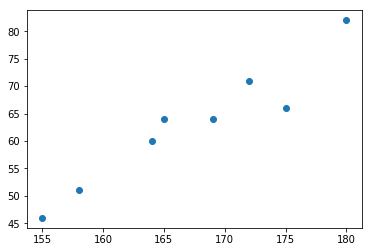

In [83]:
import matplotlib.pyplot as plt                       #only needs to be done once per python script or .ipynb notebook


plt.scatter(Sex_size_df['Height_cm'],Sex_size_df['Weight_kg'])    # x = Sex_size_df['Height_cm']
                                                                  # y = Sex_size_df['Weight_kg']  

This is a poor graph, with unlabelled axes. In future assignments we will improve on this dramatically. In the next section we make just one improvement, which is to highlight categories that the data may fall into.

## Dictionaries for data categories

Python dictionaries are useful for lots of things. In COMP 101 we used a dictionary to match up mRNA codons with the amino acids that they coded for. In graphing, dictionaries are useful for working with **categories** in your data. In the `Sex_size_df dataframe` that we created above we have a major category  - sex - that divides the data. One simple change that we could make to our graph that would make it more informative would be to indicate which datapoints correspond to individuals in the M and F categories. 

Let's make points representing males display as blue, and points corresponding to females display as red. We can create a simple dictionary to help us do this job. Another nice thing about matplotlib is that it recognizes many different ways of designating colors, including many common color words.

In [84]:
sex_color_map = {

'M' : 'blue',                 # in a dictionary the value on the left of : is the 'Key'
'F' : 'red'                   # the value on the right of : is the 'Value'
}

Now we can use this dictionary to 'translate' our data categories to the colors we want. We will use a `for` loop to walk through the data and compare each value in the 'Sex' series as a Key that will return the corresponding 'Value' from the dictionary.

Since these colors are just a visualization decision and aren't really part of our 'data' per se, we aren't going to create a new data series in our dataframe to hold these color values. We are just going to hold the data as a list of values that we will then use as a parameter in the `plt.scatter()` function. 

*(The only caveat is that if we resort our data in any way after creating this list, the values will no longer correspond to the correct observations in our dataframe.)*

['blue', 'blue', 'blue', 'blue', 'red', 'red', 'red', 'red']


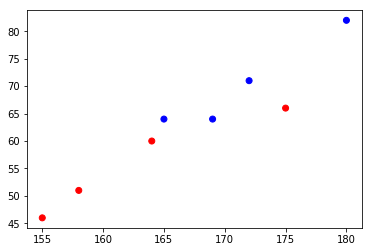

In [85]:
col = []
for i in Sex_size_df['Sex']:             # for every item in the 'Sex' series 
    col.append(sex_color_map[i])         # sex_color_map[i] consults the dictionary for each item, and returns the
                                         # value ('red' or 'blue' associated with the key ('M' or 'F')
                                         # then we make a list of those colors with the list method .append    

print(col)                               # this line is unneccessary just there to show you what we did
                                         # the list of values that displays above the graph is the result of this line


                                        # the next line is the same scatter plot as above, but we have added
                                        # a parameter color, and have sent it the set of values in 'col', 
                                        # the list we just created, 

plt.scatter(Sex_size_df['Height_cm'],Sex_size_df['Weight_kg'], c = col) 


I tried to keep this review as short as possible. Make sure you understand all of the code in this introductory assignment and go back and review your previous notebooks if necessary.


![Alt text that will appear on mouseover](images/TJU_logo_dummy_image.png "TJU logo")

